In [1]:
from pydub import AudioSegment
import numpy as np
import wave

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

In [3]:
audio_path = "data/train/audio/bed/00176480_nohash_0.wav"

In [4]:
# spf = wave.open(,mode='rb')

In [62]:
wav = AudioSegment.from_wav(audio_path)


In [63]:
wav

In [66]:
wav+10.9

In [10]:
wav = np.array(wav.get_array_of_samples()).astype(np.float32)
wav =  wav / np.iinfo(np.int16).max


In [13]:
# scipy.io.wavfile.write("test.wav",data=wav,rate=16000)

In [27]:
# y, sr = librosa.load(audio_path,sr=16000)

In [39]:
wav = AudioSegment.from_wav(audio_path)
nwav = np.array(wav.get_array_of_samples())

In [55]:
wav = AudioSegment.from_wav(audio_path)
swav = np.array(speed_change(wav,0.9).get_array_of_samples())

In [70]:
wav

In [69]:
wav.reverse()

In [52]:
speed_change(wav,0.9)

In [56]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(swav, sr=16000, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

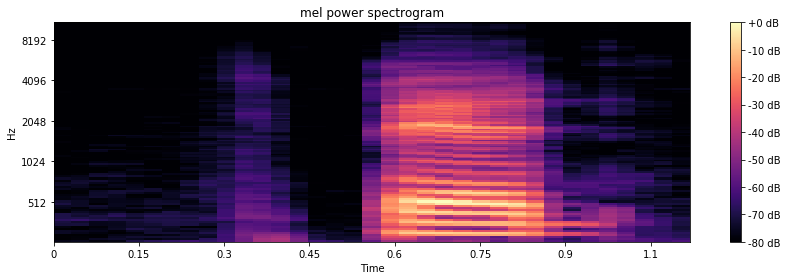

In [57]:

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

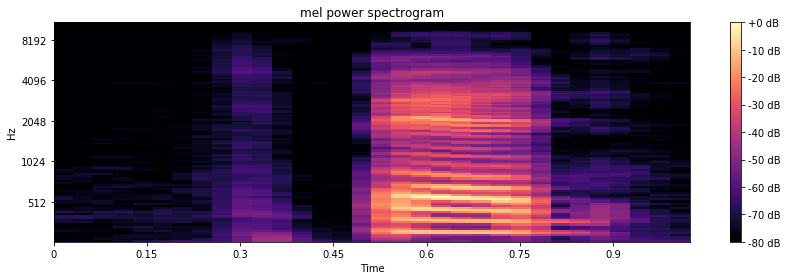

In [35]:

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

### MFCC

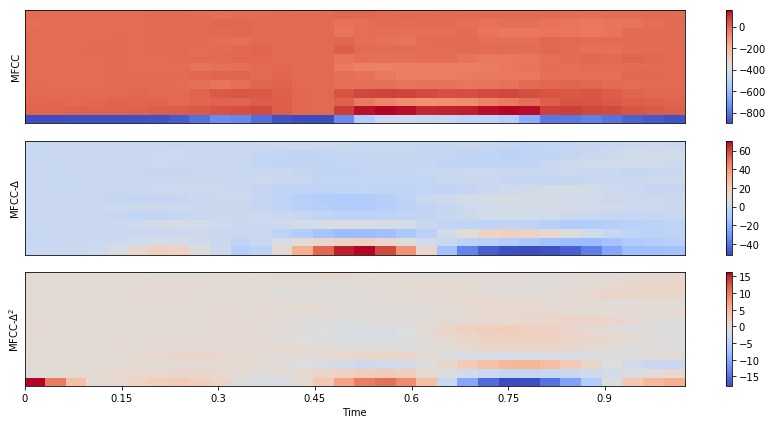

In [55]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])